# Исследование влияния признаков на целевую переменную

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from eda_utils import plot_categorical_dependence, plot_numerical_dependence

pd.set_option('display.max_columns', 30)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


### Зависимость целевой переменной от месячного дохода (Monthly_Income)

Логарифмируем переменную для удобства построения графиков

In [3]:
train['Monthly_Income'] = np.log1p(train['Monthly_Income'])

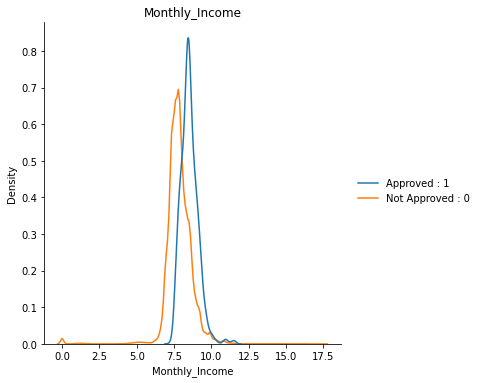

In [4]:
plot_numerical_dependence(train, 'Monthly_Income')

In [5]:
train.groupby('Approved')['Monthly_Income'].agg(['mean', 'median'])

,mean,median
Approved,,
0,7.837954,7.824446
1,8.528952,8.476580


##### Вывод
*  месячный доход у тех клиентов, кому одобрили кредит выше, чем у тех, кому кредит не одобрили

### Зависимость целевой переменной от запрошенной суммы кредита (Loan_Amount)

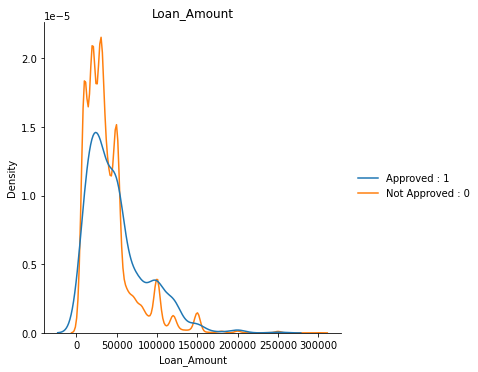

In [6]:
plot_numerical_dependence(train, 'Loan_Amount')

In [7]:
train.groupby('Approved')['Loan_Amount'].agg(['mean', 'median'])

,mean,median
Approved,,
0,39225.248427,30000.0
1,49402.366864,40000.0


##### Вывод
*  запрошенная сумма кредита у тех клиентов, кому одобрили кредит выше, чем у тех, кому кредит не одобрили

### Зависимость целевой переменной от процентной ставки запрошенного кредита (Interest_Rate)

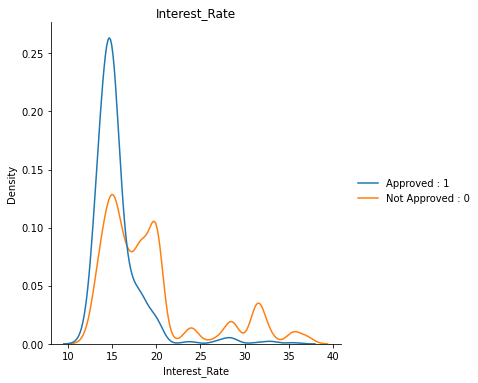

In [8]:
plot_numerical_dependence(train, 'Interest_Rate')

In [9]:
train.groupby('Approved')['Interest_Rate'].agg(['mean', 'median'])

,mean,median
Approved,,
0,19.296077,18.00
1,15.522094,14.85


##### Вывод
*  с ростом процентной ставки запрошенной суммы кредита уменьшается вероятность, что его одобрят

### Зависимость целевой переменной от месячного платежа по запрошенному кредиту (EMI)

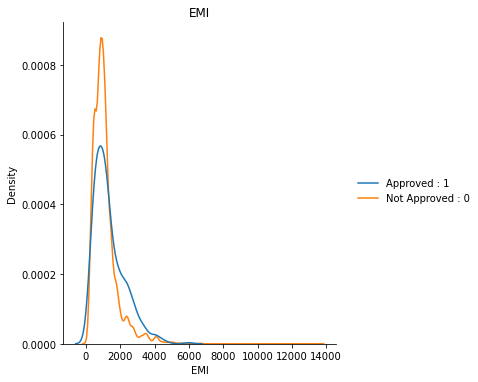

In [10]:
plot_numerical_dependence(train, 'EMI')

In [11]:
train.groupby('Approved')['EMI'].agg(['mean', 'median'])

,mean,median
Approved,,
0,1095.825600,934.0
1,1353.835729,1138.0


##### Вывод
*  планируемый месячный платеж выше у тех клиентов, кому кредит одобрили, по сравнению с теми, кому кредит не одобрили

### Категория города

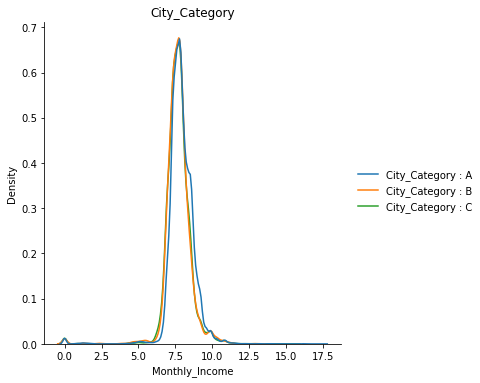

In [12]:
sns.displot(
    {
        'City_Category : A':
        train[train['City_Category'] == 'A']['Monthly_Income'],
        'City_Category : B':
        train[train['City_Category'] == 'B']['Monthly_Income'],
        'City_Category : C':
        train[train['City_Category'] == 'C']['Monthly_Income']
    },
    kind="kde",
    common_norm=False)
plt.xlabel('Monthly_Income')
plt.title('City_Category')
plt.show()

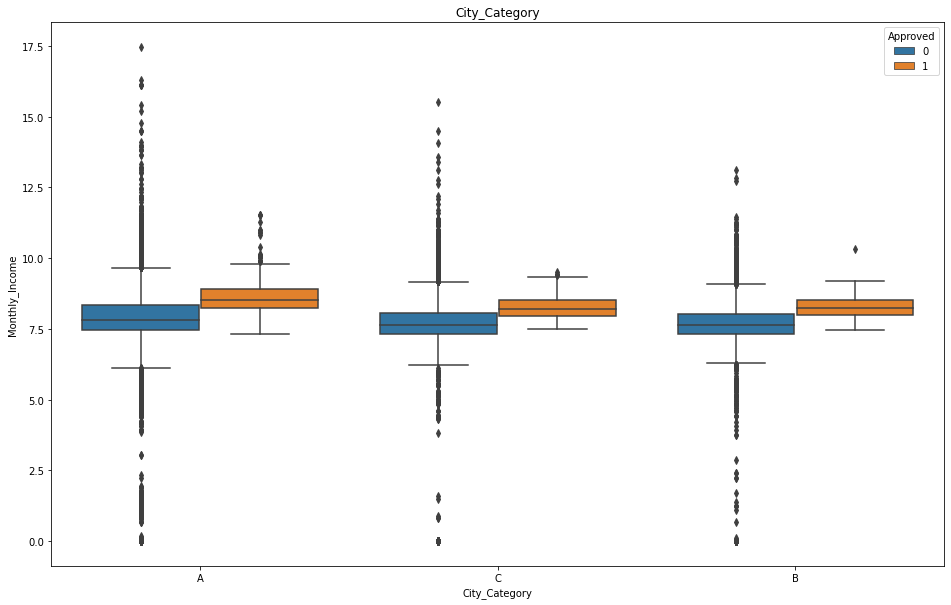

In [13]:
plt.figure(figsize=(16, 10))
sns.boxplot(y='Monthly_Income', hue='Approved', x='City_Category', data=train)
plt.title('City_Category')
plt.show()

##### Выводы
*  предполагалось, что категория города влияет на месячный доход. Например, может быть так, что категории города следующие: мегаполис, крупный город/столица региона, город районного значения (небольшой город). В таком случае скорее всего различаются и зарплаты, а следовательно, должны отличаться вероятности того, что кредит одобрят
*  Однако, категория города не влияет на месячный доход. Можно наблюдать, что для всех 3 категорий доход одинаков, лишь в категории "A" больше выбросов по сравнению с другими

### Зависимость целевой переменной от того, подтвержден контакт или нет (Contacted)

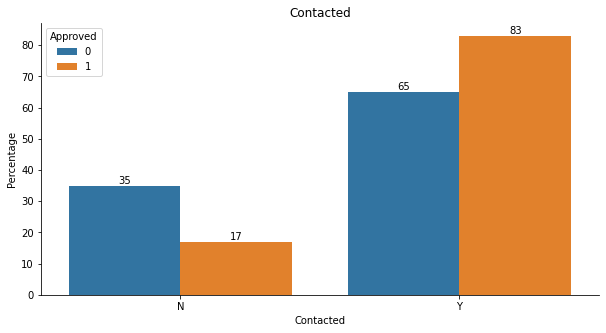

In [14]:
plot_categorical_dependence(train, 'Contacted')

##### Выводы
*  при одобрении кредита важно чтобы контак был подтвержден, поскольку из всех клиентов, кому одобрили кредит, 83% имеют подтвержденный контакт

### Зависимость целевой переменной от категории работодателя (Employer_Category1)

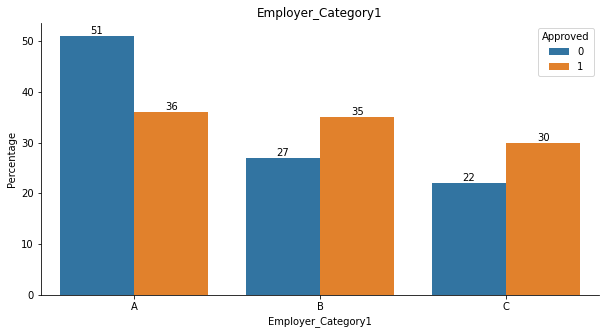

In [15]:
plot_categorical_dependence(train, 'Employer_Category1')

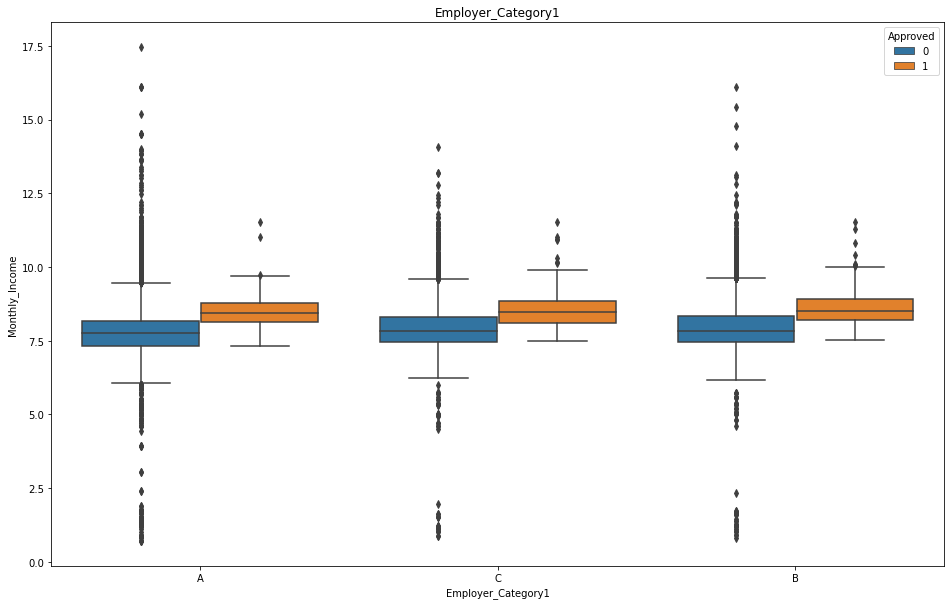

In [16]:
plt.figure(figsize=(16, 10))
sns.boxplot(y='Monthly_Income',
            hue='Approved',
            x='Employer_Category1',
            data=train)
plt.title('Employer_Category1')
plt.show()

##### Выводы
*  лишь у одной категории работодателя (A) процент неодобренных кредитов выше, чем одобренных
*  возможно, это связано с тем, что в этой категории больше клиентов с аномально низкими зарплатами. А для того, чтобы кредит одобрили месячный доход играет важную роль

### Зависимость целевой переменной от срока кредита (Loan_Period)

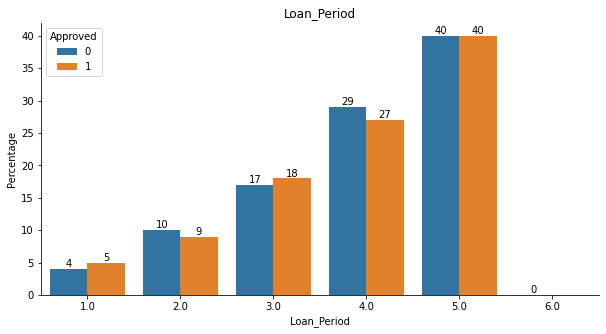

In [17]:
plot_categorical_dependence(train, 'Loan_Period')

##### Выводы
*  для одобрения кредита не важен его срок, но, как было выяснено выше, важна сумма и месячный платеж
